# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Rotem 0307
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
#Upload datasets
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

In [4]:
#Show the first 5 Rows
print("train_df:")
display(train_df.head())
print("test_df:")
display(test_df.head())

train_df:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


test_df:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [5]:
#Shows the cross-tabulation between the Pclass and Survived
pd.crosstab(train_df['Pclass'],train_df['Survived'])

Survived,0,1
Pclass,,
1,65,113
2,79,67
3,287,101


In [6]:
#Statistics
train_df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


counts:


Survived,0,1
Gender,,
Female,368,88
Male,63,193


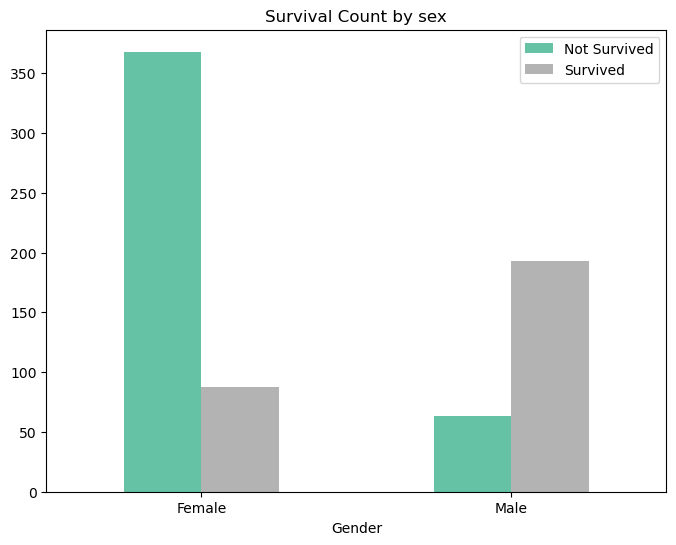

In [7]:
#the Visualization shows the relationship between passenger gender and survival
train_df_copy = train_df.copy() # for change to see the gender and not 0 or 1
train_df_copy['Gender'] = train_df_copy['Sex'].replace({0: 'Male', 1: 'Female'})
gender_survival_counts = train_df_copy.groupby(['Gender', 'Survived']).size().unstack()
print("counts:")
display(gender_survival_counts)

gender_survival_counts.plot(kind='bar', stacked=False, figsize=(8, 6), colormap='Set2')
plt.title('Survival Count by sex')
plt.xticks(rotation=0)
plt.legend(labels=['Not Survived', 'Survived'])
plt.show()

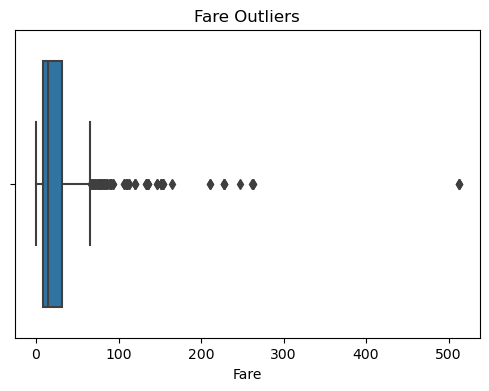

In [8]:
#Checking outliers By Fare Values 
plt.figure(figsize=(6, 4))
sns.boxplot(x=train_df['Fare'])
plt.title('Fare Outliers')
plt.xlabel('Fare')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [9]:
#Feature engineering - סילום 
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

#config scalers
scaler1 = MinMaxScaler(feature_range=(0, 1))
scaler2 = StandardScaler()

#fit train dataset
scaler1.fit(train_df[features])
scaler2.fit(train_df[features])

#transform datasets MinMaxScaler:
train_df_copy1 = train_df.copy()
train_df_copy1[features] = scaler1.transform(train_df[features])
test_df_copy1 = test_df.copy()
test_df_copy1[features] = scaler1.transform(test_df[features])

#transform datasets StandardScaler:
train_df_copy2 = train_df.copy()
train_df_copy2[features] = scaler2.transform(train_df[features])
test_df_copy2 = test_df.copy()
test_df_copy2[features] = scaler2.transform(test_df[features])

#print results on train dataset
print("train before scale:")
display(train_df.head())
print("train after MinMaxScaler:")
display(train_df_copy1.head())
print("train after StandardScaler:")
display(train_df_copy2.head())

#print results on test dataset
print("test before scaler:")
display(test_df.head())
print("test after MinMaxScaler:")
display(test_df_copy1.head())
print("test after StandardScaler:")
display(test_df_copy2.head())

train before scale:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


train after MinMaxScaler:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,0.0,0.0,0.672255,0.125,0.0,0.152766,0.333333,1
1,0.5,0.0,0.558805,0.000,0.0,0.026350,0.000000,1
2,1.0,1.0,0.243666,0.000,0.0,0.018543,0.000000,0
3,1.0,1.0,0.445355,0.000,0.0,0.015412,0.000000,0
4,1.0,1.0,0.268877,0.000,0.0,0.015713,0.000000,0


train after StandardScaler:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,-1.539037,-1.334635,1.856683,0.447601,-0.479528,0.921411,0.966584,1
1,-0.350540,-1.334635,1.173766,-0.500887,-0.479528,-0.379097,-0.573031,1
2,0.837957,0.749269,-0.723225,-0.500887,-0.479528,-0.459416,-0.573031,0
3,0.837957,0.749269,0.490849,-0.500887,-0.479528,-0.491629,-0.573031,0
4,0.837957,0.749269,-0.571466,-0.500887,-0.479528,-0.488532,-0.573031,0


test before scaler:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


test after MinMaxScaler:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,0.432749,0.0,0.0,0.013761,0.000000,0
1,1.0,1.0,0.369721,0.0,0.0,0.014151,0.000000,0
2,1.0,1.0,0.365929,0.0,0.0,0.028302,0.000000,0
3,1.0,0.0,0.256271,0.0,0.0,0.015127,0.666667,0
4,1.0,1.0,0.394933,0.0,0.0,0.110272,0.000000,1


test after StandardScaler:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,0.837957,0.749269,0.414970,-0.500887,-0.479528,-0.508612,-0.573031,0
1,0.837957,0.749269,0.035571,-0.500887,-0.479528,-0.504596,-0.573031,0
2,0.837957,0.749269,0.012741,-0.500887,-0.479528,-0.359017,-0.573031,0
3,0.837957,-1.334635,-0.647345,-0.500887,-0.479528,-0.494556,2.506199,0
4,0.837957,0.749269,0.187331,-0.500887,-0.479528,0.484254,-0.573031,1


In [10]:
#Split train to target vector and feture vector
#split by MinMaxScaler
X_train1 = train_df_copy1[features]
y_train1 = train_df_copy1['Survived']

#split by StandardScaler
X_train2 = train_df_copy2[features]
y_train2 = train_df_copy2['Survived']

In [11]:
# KNN with Hyperparameter
grid = {
    'estimator__n_neighbors': [3, 5, 7, 9, 11],
    'estimator__metric': ['euclidean', 'manhattan', 'chebyshev']
}

#set the KNN piplines for both scalers 
modelKnn = KNeighborsClassifier()
pipeline1 = Pipeline([
    ('scaler', scaler1),
    ('estimator', modelKnn)
])
pipeline2 = Pipeline([
    ('scaler', scaler2),
    ('estimator', modelKnn)
])

f1_macro_scorer = make_scorer(f1_score, average='macro')

#search MinMaxScaler:
search1 = GridSearchCV(pipeline1, param_grid=grid, cv=5, scoring={'f1_macro': f1_macro_scorer, 'accuracy': 'accuracy'}, refit='f1_macro')
search1.fit(X_train1, y_train1)
#search StandardScaler:
search2 = GridSearchCV(pipeline2, param_grid=grid, cv=5, scoring={'f1_macro': f1_macro_scorer, 'accuracy': 'accuracy'}, refit='f1_macro')
search2.fit(X_train2, y_train2)

#cv_results MinMaxScaler:
cv_results1 = pd.DataFrame(search1.cv_results_)
#cv_results StandardScaler:
cv_results2 = pd.DataFrame(search2.cv_results_)

relevant_options = ['param_estimator__n_neighbors', 'param_estimator__metric', 'mean_test_f1_macro', 'std_test_f1_macro']

#disaply results
print("Cross-validation table MinMaxScaler scaler:")
display(cv_results1[relevant_options])
print("Cross-validation table StandardScaler scaler:")
display(cv_results2[relevant_options])

#best results for MinMaxScaler
best_score_knn1 = search1.best_score_
best_params_knn1 = search1.best_params_
print("Best F1 Score with MinMaxScaler:", best_score_knn1)
print("Best Parameters with MinMaxScaler:", best_params_knn1)

#best results for StandardScaler
best_score_knn2 = search2.best_score_
best_params_knn2 = search2.best_params_
print("Best F1 Score with StandardScaler:", best_score_knn2)
print("Best Parameters with StandardScaler:", best_params_knn2)


Cross-validation table MinMaxScaler scaler:


,param_estimator__n_neighbors,param_estimator__metric,mean_test_f1_macro,std_test_f1_macro
0,3,euclidean,0.784532,0.030221
1,5,euclidean,0.770904,0.039231
2,7,euclidean,0.764194,0.032195
3,9,euclidean,0.759080,0.036056
4,11,euclidean,0.763789,0.029006
5,3,manhattan,0.786029,0.026833
6,5,manhattan,0.773750,0.035232
7,7,manhattan,0.770532,0.022366
8,9,manhattan,0.762816,0.028777
9,11,manhattan,0.769294,0.025692


Cross-validation table StandardScaler scaler:


,param_estimator__n_neighbors,param_estimator__metric,mean_test_f1_macro,std_test_f1_macro
0,3,euclidean,0.789013,0.029393
1,5,euclidean,0.764025,0.029995
2,7,euclidean,0.781115,0.028497
3,9,euclidean,0.775714,0.022774
4,11,euclidean,0.794060,0.020439
5,3,manhattan,0.775538,0.021371
6,5,manhattan,0.775592,0.037592
7,7,manhattan,0.782364,0.028222
8,9,manhattan,0.781106,0.029135
9,11,manhattan,0.790149,0.020353


Best F1 Score with MinMaxScaler: 0.7860293435368307
Best Parameters with MinMaxScaler: {'estimator__metric': 'manhattan', 'estimator__n_neighbors': 3}
Best F1 Score with StandardScaler: 0.7940598617619739
Best Parameters with StandardScaler: {'estimator__metric': 'euclidean', 'estimator__n_neighbors': 11}


In [12]:
# Naive bayes
grid = {
    'nb__var_smoothing': [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001 ]
}

#set the NB piplines for both scalers
modelNB = GaussianNB()
pipeline1 = Pipeline([
    ('scaler', scaler1),
    ('nb', modelNB )
])
pipeline2 = Pipeline([
    ('scaler', scaler2),
    ('nb', modelNB )
])

#search MinMaxScaler:
search1 = GridSearchCV(pipeline1, param_grid=grid, cv=5, scoring={'f1_macro': f1_macro_scorer, 'accuracy': 'accuracy'}, refit='f1_macro')
search1.fit(X_train1, y_train1)
#search StandardScaler:
search2 = GridSearchCV(pipeline2, param_grid=grid, cv=5, scoring={'f1_macro': f1_macro_scorer, 'accuracy': 'accuracy'}, refit='f1_macro')
search2.fit(X_train2, y_train2)

#cv_results MinMaxScaler:
cv_results1 = pd.DataFrame(search1.cv_results_)
#cv_results StandardScaler:
cv_results2 = pd.DataFrame(search2.cv_results_)

#disaply results
print("Cross-validation table MinMaxScaler scaler:")
display(cv_results1[['param_nb__var_smoothing', 'mean_test_f1_macro', 'std_test_f1_macro']])
print("Cross-validation table StandardScaler scaler:")
display(cv_results2[['param_nb__var_smoothing', 'mean_test_f1_macro', 'std_test_f1_macro']])

#best results for MinMaxScaler
best_score_NB1 = search1.best_score_
best_params_NB1 = search1.best_params_
print("Best F1 Score with MinMaxScaler:", best_score_NB1)
print("Best Parameters with MinMaxScaler:", best_params_NB1)

#best results for StandardScaler
best_score_NB2 = search2.best_score_
best_params_NB2 = search2.best_params_
print("\nBest F1 Score with StandardScaler:", best_score_NB2)
print("Best Parameters with StandardScaler:", best_params_NB2)


Cross-validation table MinMaxScaler scaler:


,param_nb__var_smoothing,mean_test_f1_macro,std_test_f1_macro
0,0.1,0.775155,0.030192
1,0.01,0.779867,0.033142
2,0.001,0.770612,0.030954
3,0.0001,0.768966,0.031496
4,0.00001,0.768966,0.031496
5,0.000001,0.768966,0.031496


Cross-validation table StandardScaler scaler:


,param_nb__var_smoothing,mean_test_f1_macro,std_test_f1_macro
0,0.1,0.772677,0.029714
1,0.01,0.768966,0.031496
2,0.001,0.768966,0.031496
3,0.0001,0.768966,0.031496
4,0.00001,0.768966,0.031496
5,0.000001,0.768966,0.031496


Best F1 Score with MinMaxScaler: 0.7798670754392647
Best Parameters with MinMaxScaler: {'nb__var_smoothing': 0.01}

Best F1 Score with StandardScaler: 0.772676844286797
Best Parameters with StandardScaler: {'nb__var_smoothing': 0.1}


In [13]:
# 5-fold-cross-validation with F1 Score KNN vs NB:

data = []
data.append({
    'Model': "KNN - MinMaxScaler",
    'Best Parameters': best_params_knn1,
    'Best F1 Score': best_score_knn1
})

data.append({
    'Model': "KNN - StandardScaler",
    'Best Parameters': best_params_knn2,
    'Best F1 Score': best_score_knn2
})

data.append({
    'Model': "Naive Base - MinMaxScaler",
    'Best Parameters': best_params_NB1,
    'Best F1 Score': best_score_NB1
})

data.append({
    'Model': "Naive Base - StandardScaler",
    'Best Parameters': best_params_NB2,
    'Best F1 Score': best_score_NB2
})
results = pd.DataFrame(data)
results

,Model,Best Parameters,Best F1 Score
0,KNN - MinMaxScaler,"{'estimator__metric': 'manhattan', 'estimator_...",0.786029
1,KNN - StandardScaler,"{'estimator__metric': 'euclidean', 'estimator_...",0.794060
2,Naive Base - MinMaxScaler,{'nb__var_smoothing': 0.01},0.779867
3,Naive Base - StandardScaler,{'nb__var_smoothing': 0.1},0.772677


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [14]:
# Train on entire training set the best knn model 
scaler2.fit(train_df_copy2[features])
X_train = scaler2.transform(train_df_copy2[features])
y_train = train_df_copy2['Survived']
best_knn = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
best_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

## Part 5 - Apply on test and show model performance estimation

In [15]:
#Apply on test and show results
X_test = scaler2.transform(test_df_copy2[features])
y_test = test_df['Survived']
y_pred = best_knn.predict(X_test)

print("First 5 Predictions:", y_pred[:5])

f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"F1 Macro Score on Test Set: {f1_macro}")

First 5 Predictions: [0 0 0 1 0]
F1 Macro Score on Test Set: 0.817481804437256
